In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
coordinates = list(lat_lngs)

In [11]:
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [13]:
import requests
from config import weather_api_key

In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | hit
Processing Record 3 of Set 1 | huarmey
Processing Record 4 of Set 1 | sabha
Processing Record 5 of Set 1 | abong mbang
Processing Record 6 of Set 1 | chapais
Processing Record 7 of Set 1 | san juan
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | margate
Processing Record 10 of Set 1 | portland
Processing Record 11 of Set 1 | atar
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | flin flon
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | havre-saint-pierre
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of Set 1 | inhambane
Processi

Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | mount isa
Processing Record 44 of Set 4 | nizhniy kuranakh
Processing Record 45 of Set 4 | xinzhi
Processing Record 46 of Set 4 | nushki
Processing Record 47 of Set 4 | canberra
Processing Record 48 of Set 4 | lamin
Processing Record 49 of Set 4 | bhum
Processing Record 50 of Set 4 | suntar
Processing Record 1 of Set 5 | iqaluit
Processing Record 2 of Set 5 | guerrero negro
Processing Record 3 of Set 5 | quilmana
Processing Record 4 of Set 5 | san antonio
Processing Record 5 of Set 5 | airai
Processing Record 6 of Set 5 | nikolskoye
Processing Record 7 of Set 5 | dingle
Processing Record 8 of Set 5 | karuzi
Processing Record 9 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 5 | wiarton
Processing Record 11 of Set 5 | khanpur
Processing Record 12 of Set 5 | labytnangi
Processing Record 13 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 14 of Set 5 | nizhnevartovsk

Processing Record 27 of Set 8 | cabedelo
Processing Record 28 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 29 of Set 8 | khatanga
Processing Record 30 of Set 8 | provideniya
Processing Record 31 of Set 8 | zapolyarnyy
Processing Record 32 of Set 8 | misawa
Processing Record 33 of Set 8 | abalak
Processing Record 34 of Set 8 | arrecife
Processing Record 35 of Set 8 | san cristobal
Processing Record 36 of Set 8 | khorixas
Processing Record 37 of Set 8 | rondonopolis
Processing Record 38 of Set 8 | eldama ravine
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | katsuura
Processing Record 41 of Set 8 | talnakh
Processing Record 42 of Set 8 | utiroa
City not found. Skipping...
Processing Record 43 of Set 8 | medowie
Processing Record 44 of Set 8 | lasa
Processing Record 45 of Set 8 | nanlong
Processing Record 46 of Set 8 | fraserburgh
Processing Record 47 of Set 8 | wencheng
Processing Record 48 of Set 8 | bambous virieux
Processing Record 49 of

Processing Record 16 of Set 12 | xichang
Processing Record 17 of Set 12 | punta alta
Processing Record 18 of Set 12 | scarborough
Processing Record 19 of Set 12 | harper
Processing Record 20 of Set 12 | humenne
Processing Record 21 of Set 12 | arkhangelsk
Processing Record 22 of Set 12 | seoul
Processing Record 23 of Set 12 | road town
Processing Record 24 of Set 12 | vanimo
Processing Record 25 of Set 12 | bac lieu
Processing Record 26 of Set 12 | itainopolis
Processing Record 27 of Set 12 | meyungs
City not found. Skipping...
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | port-gentil
Processing Record 30 of Set 12 | pascagoula
Processing Record 31 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 32 of Set 12 | boras
Processing Record 33 of Set 12 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 34 of Set 12 | camacha
Processing Record 35 of Set 12 | rio grande
Processing Record 36 of Set 12 | pemangkat
Processing Recor

In [17]:
len(city_data)

552

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Patricio,28.0170,-97.5169,53.92,88,23,5.10,US,2022-02-11 12:26:09
1,Hit,33.6416,42.8251,63.54,33,4,7.94,IQ,2022-02-11 12:26:09
2,Huarmey,-10.0681,-78.1522,70.59,83,100,5.73,PE,2022-02-11 12:26:09
3,Sabha,27.0377,14.4283,59.74,24,0,8.90,LY,2022-02-11 12:26:10
4,Abong Mbang,3.9833,13.1833,98.73,9,99,2.98,CM,2022-02-11 12:26:10
5,Chapais,49.7834,-74.8492,-4.22,100,85,4.03,CA,2022-02-11 12:26:10
6,San Juan,-31.5375,-68.5364,64.38,72,100,13.89,AR,2022-02-11 12:26:11
7,Rikitea,-23.1203,-134.9692,78.84,74,16,19.37,PF,2022-02-11 12:26:11
8,Margate,51.3813,1.3862,48.18,68,2,6.06,GB,2022-02-11 12:26:11
9,Portland,45.5234,-122.6762,46.98,90,100,1.99,US,2022-02-11 12:25:07


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [21]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2022-02-11 12:26:09,28.0170,-97.5169,53.92,88,23,5.10
1,Hit,IQ,2022-02-11 12:26:09,33.6416,42.8251,63.54,33,4,7.94
2,Huarmey,PE,2022-02-11 12:26:09,-10.0681,-78.1522,70.59,83,100,5.73
3,Sabha,LY,2022-02-11 12:26:10,27.0377,14.4283,59.74,24,0,8.90
4,Abong Mbang,CM,2022-02-11 12:26:10,3.9833,13.1833,98.73,9,99,2.98
5,Chapais,CA,2022-02-11 12:26:10,49.7834,-74.8492,-4.22,100,85,4.03
6,San Juan,AR,2022-02-11 12:26:11,-31.5375,-68.5364,64.38,72,100,13.89
7,Rikitea,PF,2022-02-11 12:26:11,-23.1203,-134.9692,78.84,74,16,19.37
8,Margate,GB,2022-02-11 12:26:11,51.3813,1.3862,48.18,68,2,6.06
9,Portland,US,2022-02-11 12:25:07,45.5234,-122.6762,46.98,90,100,1.99


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

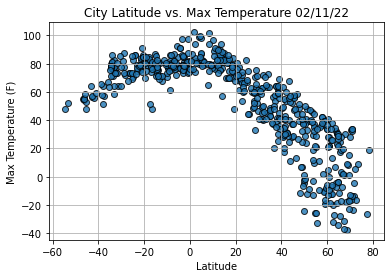

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

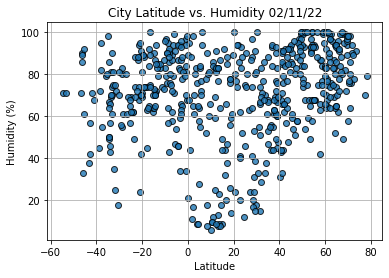

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

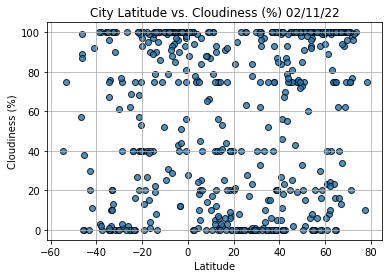

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

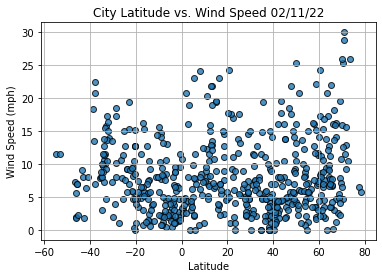

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

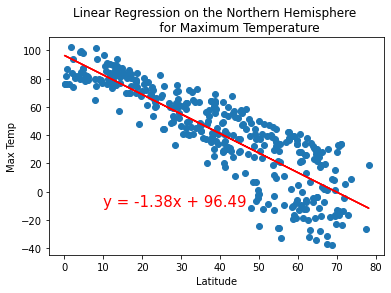

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n            for Maximum Temperature', 'Max Temp',(10,-10))

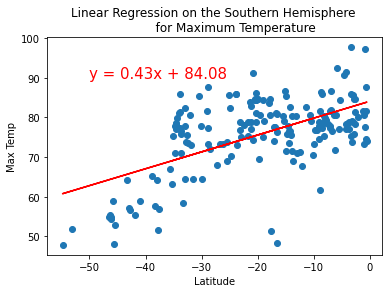

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n           for Maximum Temperature', 'Max Temp',(-50,90))

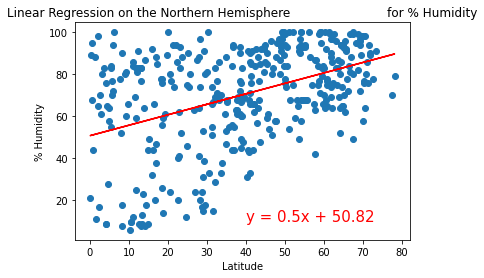

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

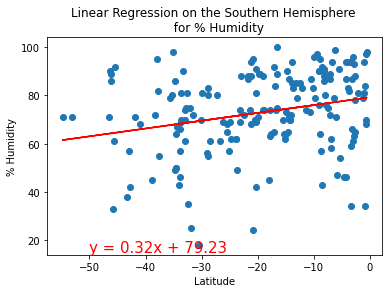

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for % Humidity', '% Humidity',(-50,15))

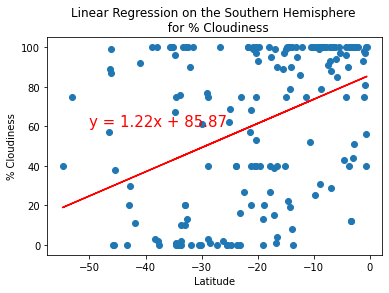

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for % Cloudiness', '% Cloudiness',(-50,60))

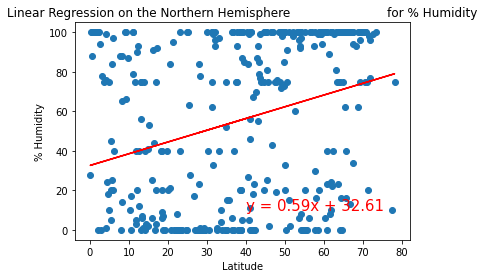

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

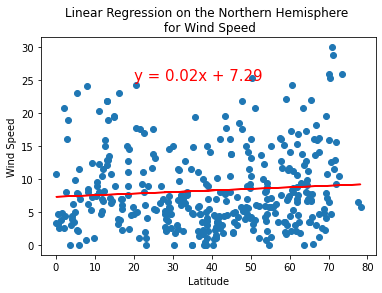

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,25))

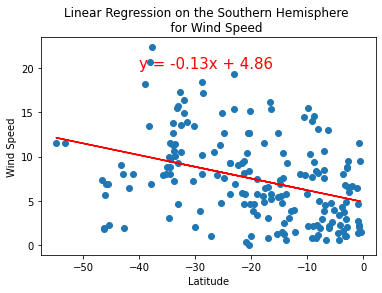

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n    for Wind Speed', 'Wind Speed',(-40,20))